# Israel & Palestine Tweets - Sentiment Analysis

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

plt.style.use('ggplot')

In [19]:
# Read in data
df = pd.read_csv('../data/israel_palestine.csv')
print(df.shape)

(1360, 15)


In [21]:
df = df.rename(columns={'Unnamed: 0': 'ID'})
df.head()

,ID,Category,Keyword,Web_Page_URL,Tweet_Website,Author_Name,Author_Web_Page_URL,Tweet_Timestamp,Polarity,Tweet_Content,Tweet_Image_URL,Tweet_Number_of_Likes,Tweet_Number_of_Retweets,Tweet_Number_of_Reviews,Tweet_Number_of_Looks
0,0,Top,#IsraelPalestineConflict,https://twitter.com/search?q=%23IsraelPalestin...,https://twitter.com/Tahir_Awan000/status/17151...,Tahir Awan,https://twitter.com/Tahir_Awan000,45218,1,BIG BREAKING: youth of Bahrain just burnt #isr...,https://pbs.twimg.com/ext_tw_video_thumb/17151...,135,56,14,NaN
1,1,Top,#IsraelPalestineConflict,https://twitter.com/search?q=%23IsraelPalestin...,https://twitter.com/khankasher1/status/1715109...,PTI خان,https://twitter.com/khankasher1,45218,1,Egyptian Comedian Bassem Youssef on Israel:“It...,https://pbs.twimg.com/ext_tw_video_thumb/17151...,217,91,15,NaN
2,2,Top,#IsraelPalestineConflict,https://twitter.com/search?q=%23IsraelPalestin...,https://twitter.com/sickofuzzie/status/1715074...,M Faizan Khan©®,https://twitter.com/sickofuzzie,45218,1,#BREAKING Israel destroyed the largest tower i...,https://pbs.twimg.com/ext_tw_video_thumb/17150...,22,23,7,NaN
3,3,Top,#IsraelPalestineConflict,https://twitter.com/search?q=%23IsraelPalestin...,https://twitter.com/sickofuzzie/status/1715071...,M Faizan Khan©®,https://twitter.com/sickofuzzie,45218,1,#BREAKING A super Massive Demonstration in #Pa...,NaN,72,29,9,NaN
4,4,Top,#IsraelPalestineConflict,https://twitter.com/search?q=%23IsraelPalestin...,https://twitter.com/abdulrdabboussi/status/171...,Abdul-Rahman,https://twitter.com/abdulrdabboussi,Oct 19Oct 19,?,Umm I think the needed some help to correct th...,https://pbs.twimg.com/media/F81w3nGW8AAbiwi?fo...,1,3,1,NaN


In [37]:
df['Keyword'].value_counts()

Keyword
#ProPalestine               451
#ProIsrael                  397
#IsraelPalestineWar         231
#Palestine                  127
#Israel                     124
#IsraelPalestineConflict     30
Name: count, dtype: int64

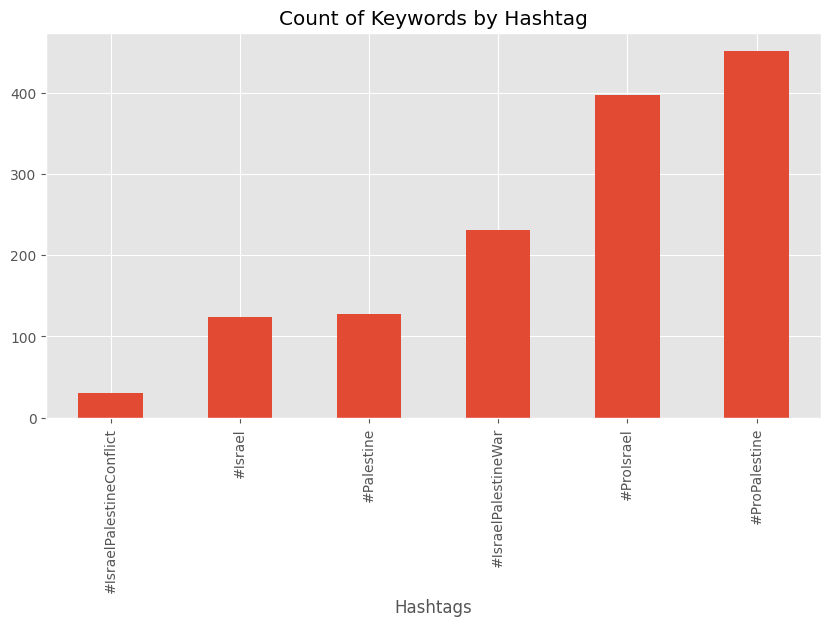

In [22]:
ax = df['Keyword'].value_counts().sort_index().sort_values() \
    .plot(kind='bar',
          title='Count of Keywords by Hashtag',
          figsize=(10,5))
ax.set_xlabel('Hashtags')
plt.show()

## VADER Sentiment Scoring

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [24]:
sia = SentimentIntensityAnalyzer()

In [25]:
# Run the polarity score on the entire dataset
res = {}

for index, row in df.iterrows():
    text = row['Tweet_Content']
    myid = row['ID']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
    res[myid] = vader_result_rename

In [26]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df, how='left')

In [27]:
# Sentiment score and metadata
vaders.head()

,ID,vader_neg,vader_neu,vader_pos,vader_compound,Category,Keyword,Web_Page_URL,Tweet_Website,Author_Name,Author_Web_Page_URL,Tweet_Timestamp,Polarity,Tweet_Content,Tweet_Image_URL,Tweet_Number_of_Likes,Tweet_Number_of_Retweets,Tweet_Number_of_Reviews,Tweet_Number_of_Looks
0,0,0.000,1.000,0.000,0.0000,Top,#IsraelPalestineConflict,https://twitter.com/search?q=%23IsraelPalestin...,https://twitter.com/Tahir_Awan000/status/17151...,Tahir Awan,https://twitter.com/Tahir_Awan000,45218,1,BIG BREAKING: youth of Bahrain just burnt #isr...,https://pbs.twimg.com/ext_tw_video_thumb/17151...,135,56,14,NaN
1,1,0.000,0.855,0.145,0.6249,Top,#IsraelPalestineConflict,https://twitter.com/search?q=%23IsraelPalestin...,https://twitter.com/khankasher1/status/1715109...,PTI خان,https://twitter.com/khankasher1,45218,1,Egyptian Comedian Bassem Youssef on Israel:“It...,https://pbs.twimg.com/ext_tw_video_thumb/17151...,217,91,15,NaN
2,2,0.246,0.754,0.000,-0.7351,Top,#IsraelPalestineConflict,https://twitter.com/search?q=%23IsraelPalestin...,https://twitter.com/sickofuzzie/status/1715074...,M Faizan Khan©®,https://twitter.com/sickofuzzie,45218,1,#BREAKING Israel destroyed the largest tower i...,https://pbs.twimg.com/ext_tw_video_thumb/17150...,22,23,7,NaN
3,3,0.000,0.652,0.348,0.7906,Top,#IsraelPalestineConflict,https://twitter.com/search?q=%23IsraelPalestin...,https://twitter.com/sickofuzzie/status/1715071...,M Faizan Khan©®,https://twitter.com/sickofuzzie,45218,1,#BREAKING A super Massive Demonstration in #Pa...,NaN,72,29,9,NaN
4,4,0.153,0.765,0.083,-0.5093,Top,#IsraelPalestineConflict,https://twitter.com/search?q=%23IsraelPalestin...,https://twitter.com/abdulrdabboussi/status/171...,Abdul-Rahman,https://twitter.com/abdulrdabboussi,Oct 19Oct 19,?,Umm I think the needed some help to correct th...,https://pbs.twimg.com/media/F81w3nGW8AAbiwi?fo...,1,3,1,NaN


In [49]:
vaders.groupby('Keyword').vader_neg.describe()

,count,mean,std,min,25%,50%,75%,max
Keyword,,,,,,,,
#Israel,124.0,0.108855,0.116504,0.0,0.0,0.0885,0.17275,0.625
#IsraelPalestineConflict,30.0,0.120000,0.135890,0.0,0.0,0.0850,0.20650,0.512
#IsraelPalestineWar,231.0,0.104013,0.105711,0.0,0.0,0.0930,0.16800,0.419
#Palestine,127.0,0.096890,0.109766,0.0,0.0,0.0830,0.15250,0.524
#ProIsrael,397.0,0.116423,0.117176,0.0,0.0,0.0990,0.19100,0.533
#ProPalestine,451.0,0.130310,0.114562,0.0,0.0,0.1220,0.20300,0.543


In [50]:
vaders.groupby('Keyword').vader_neu.describe()

,count,mean,std,min,25%,50%,75%,max
Keyword,,,,,,,,
#Israel,124.0,0.823145,0.137480,0.375,0.73775,0.8265,0.93250,1.0
#IsraelPalestineConflict,30.0,0.814933,0.149637,0.488,0.73650,0.8265,0.97575,1.0
#IsraelPalestineWar,231.0,0.839905,0.115464,0.465,0.75800,0.8410,0.92000,1.0
#Palestine,127.0,0.810244,0.149538,0.330,0.71800,0.8260,0.91550,1.0
#ProIsrael,397.0,0.797864,0.135760,0.388,0.70500,0.7950,0.89700,1.0
#ProPalestine,451.0,0.813865,0.126743,0.402,0.72250,0.8220,0.90750,1.0


In [51]:
vaders.groupby('Keyword').vader_pos.describe()

,count,mean,std,min,25%,50%,75%,max
Keyword,,,,,,,,
#Israel,124.0,0.068024,0.085817,0.0,0.0,0.000,0.12275,0.419
#IsraelPalestineConflict,30.0,0.065033,0.095985,0.0,0.0,0.000,0.09625,0.348
#IsraelPalestineWar,231.0,0.056095,0.078925,0.0,0.0,0.000,0.10300,0.343
#Palestine,127.0,0.092937,0.130693,0.0,0.0,0.056,0.14050,0.670
#ProIsrael,397.0,0.085723,0.105639,0.0,0.0,0.061,0.14000,0.600
#ProPalestine,451.0,0.055814,0.081865,0.0,0.0,0.000,0.09200,0.512


In [52]:
vaders.groupby('Keyword').vader_compound.describe()

,count,mean,std,min,25%,50%,75%,max
Keyword,,,,,,,,
#Israel,124.0,-0.135047,0.519200,-0.9551,-0.639825,0.00000,0.2732,0.9246
#IsraelPalestineConflict,30.0,-0.168423,0.529611,-0.9349,-0.694300,-0.07655,0.0000,0.7906
#IsraelPalestineWar,231.0,-0.155383,0.459465,-0.9517,-0.524850,-0.16470,0.0000,0.8555
#Palestine,127.0,-0.063779,0.503907,-0.9622,-0.476700,0.00000,0.3182,0.9081
#ProIsrael,397.0,-0.105990,0.537446,-0.9728,-0.612400,0.00000,0.3400,0.9382
#ProPalestine,451.0,-0.248023,0.455664,-0.9545,-0.659700,-0.25000,0.0000,0.8910


### Plot VADER Results

C:\Users\uyvie\AppData\Local\Temp\ipykernel_27972\2136759013.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=vaders.sort_values(by='vader_compound'),
C:\Users\uyvie\AppData\Local\Temp\ipykernel_27972\2136759013.py:3: UserWarning: The palette list has more values (9) than needed (6), which may not be intended.
  ax = sns.barplot(data=vaders.sort_values(by='vader_compound'),


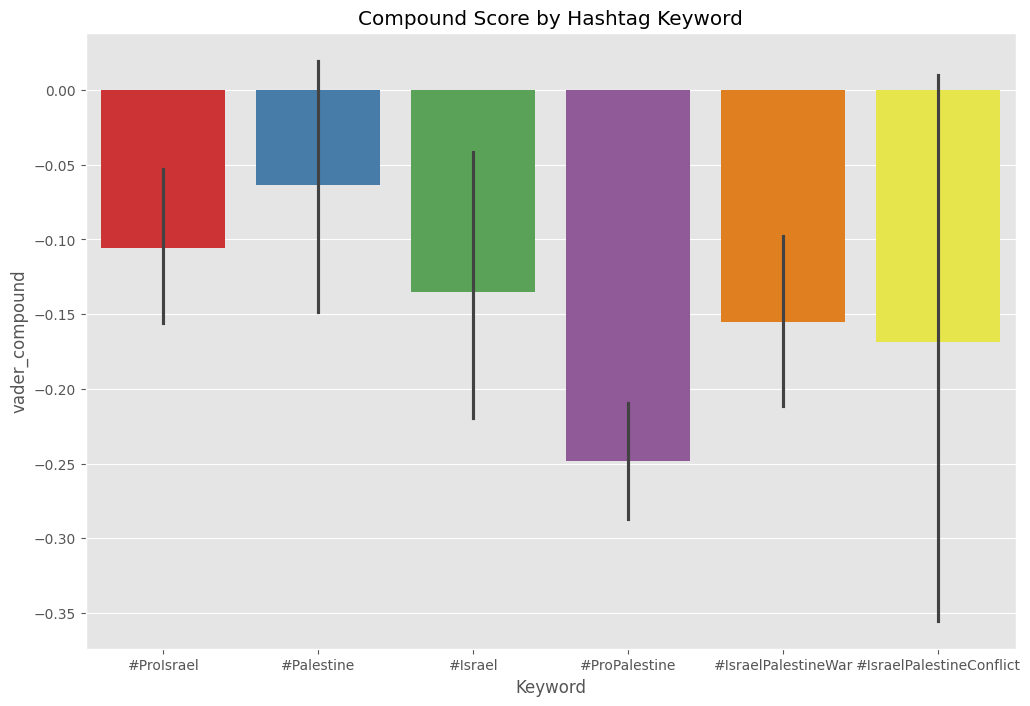

In [28]:
plt.figure(figsize=(12, 8))

ax = sns.barplot(data=vaders.sort_values(by='vader_compound'),
                 x='Keyword', y='vader_compound',
                 palette=sns.color_palette('Set1'))
ax.set_title('Compound Score by Hashtag Keyword')
plt.show()

In [62]:
# fig, axs = plt.subplots(1, 3, figsize=(50, 20))
# sns.barplot(data=vaders.sort_values(by='vader_neg'),
#             x='Keyword', y='vader_neg',
#             palette=sns.color_palette('Set1'),
#             ax=axs[0])
# sns.barplot(data=vaders.sort_values(by='vader_neu'),
#             x='Keyword', y='vader_neu',
#             palette=sns.color_palette('Set1'),
#             ax=axs[1])
# sns.barplot(data=vaders.sort_values(by='vader_pos'),
#             x='Keyword', y='vader_pos',
#             palette=sns.color_palette('Set1'),
#             ax=axs[2])
# axs[0].set_title('Negative')
# axs[1].set_title('Neutral')
# axs[2].set_title('Positive')
# plt.tight_layout()
# plt.show()

C:\Users\uyvie\AppData\Local\Temp\ipykernel_27972\3700802123.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_neg, x='Keyword', y='vader_neg', palette=sns.color_palette('Set1'), ax=axs[0])
C:\Users\uyvie\AppData\Local\Temp\ipykernel_27972\3700802123.py:9: UserWarning: The palette list has more values (9) than needed (6), which may not be intended.
  sns.barplot(data=sorted_neg, x='Keyword', y='vader_neg', palette=sns.color_palette('Set1'), ax=axs[0])
C:\Users\uyvie\AppData\Local\Temp\ipykernel_27972\3700802123.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_neu, x='Keyword', y='vader_neu', palette=sns.color_palette('Set1'), ax=axs[1])
C:\Users\uyvie\AppData\

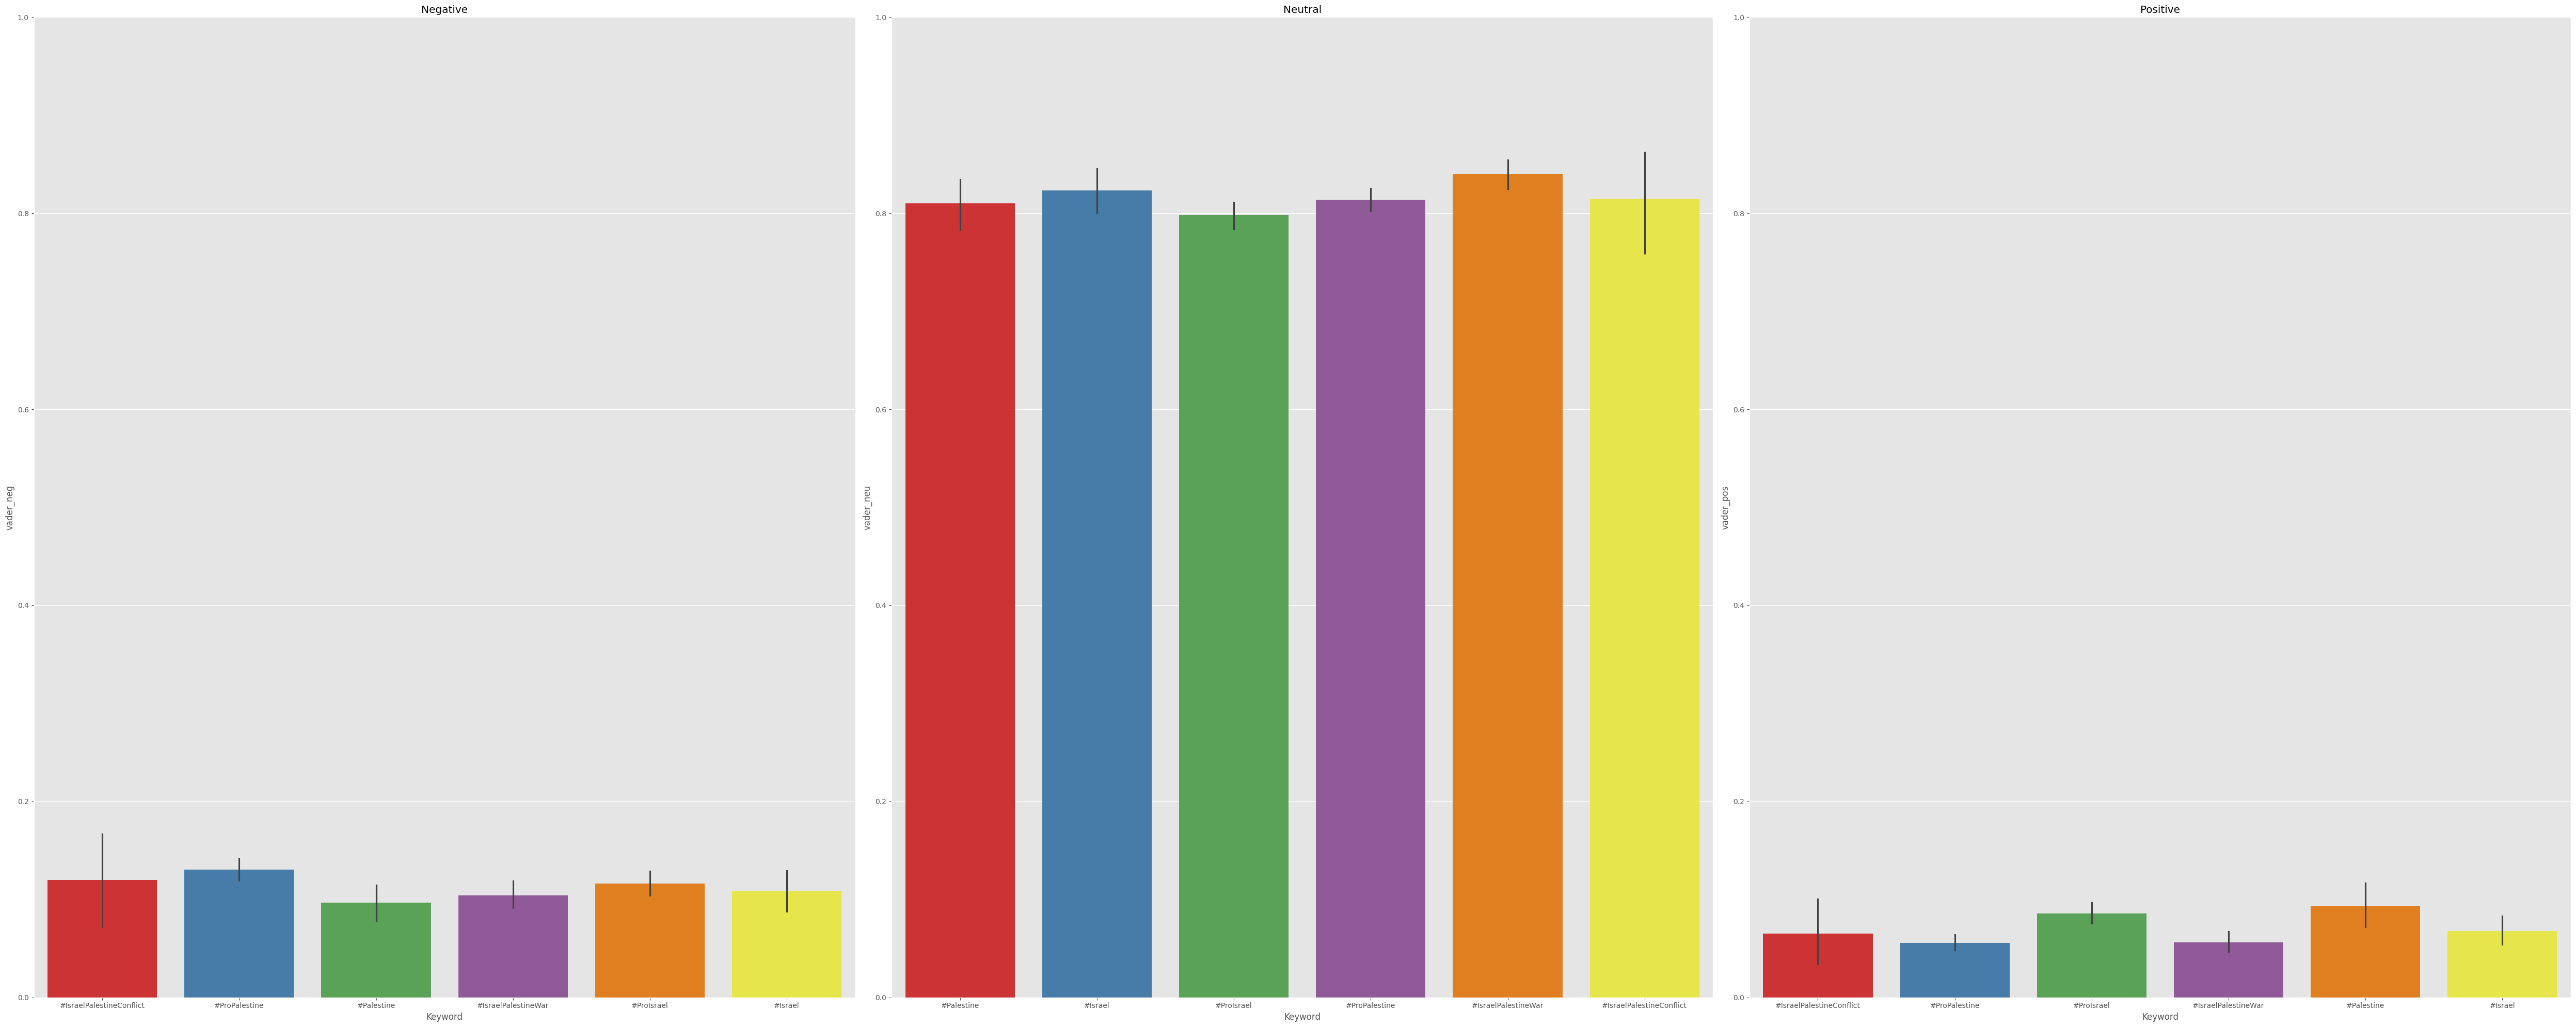

In [59]:
fig, axs = plt.subplots(1, 3, figsize=(50, 20))

# Sort values by the desired column for each subplot
sorted_neg = vaders.sort_values(by='vader_neg')
sorted_neu = vaders.sort_values(by='vader_neu')
sorted_pos = vaders.sort_values(by='vader_pos')

# Create bar plots and set common y-axis limit
sns.barplot(data=sorted_neg, x='Keyword', y='vader_neg', palette=sns.color_palette('Set1'), ax=axs[0])
axs[0].set_title('Negative')

sns.barplot(data=sorted_neu, x='Keyword', y='vader_neu', palette=sns.color_palette('Set1'), ax=axs[1])
axs[1].set_title('Neutral')

sns.barplot(data=sorted_pos, x='Keyword', y='vader_pos', palette=sns.color_palette('Set1'), ax=axs[2])
axs[2].set_title('Positive')

# Set common y-axis limit
max_y = max(sorted_neg['vader_neg'].max(), sorted_neu['vader_neu'].max(), sorted_pos['vader_pos'].max())
for ax in axs:
    ax.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

## Roberta Pretrained Model

In [30]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [31]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [32]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [33]:
# Run for Roberta Model
res = {}

for index, row in df.iterrows():
    text = row['Tweet_Content']
    myid = row['ID']
    roberta_result = polarity_scores_roberta(text)
    res[myid] = roberta_result

In [34]:
robertas = pd.DataFrame(res).T
robertas = robertas.reset_index().rename(columns={'index': 'ID'})
robertas = robertas.merge(df, how='left')

In [35]:
# Sentiment score and metadata
robertas.head()

,ID,roberta_neg,roberta_neu,roberta_pos,Category,Keyword,Web_Page_URL,Tweet_Website,Author_Name,Author_Web_Page_URL,Tweet_Timestamp,Polarity,Tweet_Content,Tweet_Image_URL,Tweet_Number_of_Likes,Tweet_Number_of_Retweets,Tweet_Number_of_Reviews,Tweet_Number_of_Looks
0,0,0.846762,0.147117,0.006120,Top,#IsraelPalestineConflict,https://twitter.com/search?q=%23IsraelPalestin...,https://twitter.com/Tahir_Awan000/status/17151...,Tahir Awan,https://twitter.com/Tahir_Awan000,45218,1,BIG BREAKING: youth of Bahrain just burnt #isr...,https://pbs.twimg.com/ext_tw_video_thumb/17151...,135,56,14,NaN
1,1,0.896014,0.096477,0.007509,Top,#IsraelPalestineConflict,https://twitter.com/search?q=%23IsraelPalestin...,https://twitter.com/khankasher1/status/1715109...,PTI خان,https://twitter.com/khankasher1,45218,1,Egyptian Comedian Bassem Youssef on Israel:“It...,https://pbs.twimg.com/ext_tw_video_thumb/17151...,217,91,15,NaN
2,2,0.929657,0.066514,0.003829,Top,#IsraelPalestineConflict,https://twitter.com/search?q=%23IsraelPalestin...,https://twitter.com/sickofuzzie/status/1715074...,M Faizan Khan©®,https://twitter.com/sickofuzzie,45218,1,#BREAKING Israel destroyed the largest tower i...,https://pbs.twimg.com/ext_tw_video_thumb/17150...,22,23,7,NaN
3,3,0.329700,0.612393,0.057907,Top,#IsraelPalestineConflict,https://twitter.com/search?q=%23IsraelPalestin...,https://twitter.com/sickofuzzie/status/1715071...,M Faizan Khan©®,https://twitter.com/sickofuzzie,45218,1,#BREAKING A super Massive Demonstration in #Pa...,NaN,72,29,9,NaN
4,4,0.788078,0.197413,0.014509,Top,#IsraelPalestineConflict,https://twitter.com/search?q=%23IsraelPalestin...,https://twitter.com/abdulrdabboussi/status/171...,Abdul-Rahman,https://twitter.com/abdulrdabboussi,Oct 19Oct 19,?,Umm I think the needed some help to correct th...,https://pbs.twimg.com/media/F81w3nGW8AAbiwi?fo...,1,3,1,NaN


In [54]:
robertas.groupby('Keyword').roberta_neg.describe()

,count,mean,std,min,25%,50%,75%,max
Keyword,,,,,,,,
#Israel,124.0,0.658577,0.267374,0.005795,0.524506,0.755799,0.870257,0.975863
#IsraelPalestineConflict,30.0,0.670952,0.260858,0.041806,0.505237,0.767918,0.882767,0.957522
#IsraelPalestineWar,231.0,0.666643,0.235028,0.005800,0.532333,0.708380,0.862255,0.982871
#Palestine,127.0,0.624694,0.290733,0.001998,0.385705,0.695557,0.902547,0.978225
#ProIsrael,397.0,0.595290,0.304651,0.001234,0.372680,0.652103,0.871417,0.973482
#ProPalestine,451.0,0.615148,0.284061,0.001348,0.397651,0.695321,0.848447,0.978335


In [58]:
robertas.groupby('Keyword').roberta_neu.describe()

,count,mean,std,min,25%,50%,75%,max
Keyword,,,,,,,,
#Israel,124.0,0.280922,0.198191,0.022315,0.123804,0.223357,0.399258,0.911671
#IsraelPalestineConflict,30.0,0.277549,0.194556,0.039741,0.109636,0.216545,0.443162,0.777857
#IsraelPalestineWar,231.0,0.291729,0.184392,0.014853,0.132012,0.271963,0.396171,0.762200
#Palestine,127.0,0.307370,0.220190,0.020029,0.092602,0.265485,0.505539,0.875981
#ProIsrael,397.0,0.304223,0.212360,0.012791,0.109727,0.273429,0.452734,0.853902
#ProPalestine,451.0,0.318167,0.221301,0.013732,0.136631,0.256572,0.475766,0.900186


In [56]:
robertas.groupby('Keyword').roberta_pos.describe()

,count,mean,std,min,25%,50%,75%,max
Keyword,,,,,,,,
#Israel,124.0,0.060501,0.145014,0.001821,0.006125,0.011941,0.035171,0.837581
#IsraelPalestineConflict,30.0,0.051499,0.105218,0.002552,0.006573,0.012784,0.032937,0.470088
#IsraelPalestineWar,231.0,0.041628,0.097395,0.001818,0.006210,0.013720,0.029903,0.753258
#Palestine,127.0,0.067935,0.144759,0.001746,0.005142,0.015669,0.048149,0.970136
#ProIsrael,397.0,0.100487,0.200649,0.001806,0.006617,0.018653,0.076286,0.985975
#ProPalestine,451.0,0.066685,0.155219,0.001627,0.007394,0.016918,0.046776,0.984920


In [61]:
# fig, axs = plt.subplots(1, 3, figsize=(50, 20))
# sns.barplot(data=robertas.sort_values(by='roberta_neg'),
#             x='Keyword', y='roberta_neg',
#             palette=sns.color_palette('Set1'),
#             ax=axs[0])
# sns.barplot(data=robertas.sort_values(by='roberta_neu'),
#             x='Keyword', y='roberta_neu',
#             palette=sns.color_palette('Set1'),
#             ax=axs[1])
# sns.barplot(data=robertas.sort_values(by='roberta_pos'),
#             x='Keyword', y='roberta_pos',
#             palette=sns.color_palette('Set1'),
#             ax=axs[2])
# axs[0].set_title('Negative')
# axs[1].set_title('Neutral')
# axs[2].set_title('Positive')
# plt.tight_layout()
# plt.show()

C:\Users\uyvie\AppData\Local\Temp\ipykernel_27972\1955249748.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_neg_roberta, x='Keyword', y='roberta_neg', palette=sns.color_palette('Set1'), ax=axs[0])
C:\Users\uyvie\AppData\Local\Temp\ipykernel_27972\1955249748.py:14: UserWarning: The palette list has more values (9) than needed (6), which may not be intended.
  sns.barplot(data=sorted_neg_roberta, x='Keyword', y='roberta_neg', palette=sns.color_palette('Set1'), ax=axs[0])
C:\Users\uyvie\AppData\Local\Temp\ipykernel_27972\1955249748.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_neu_roberta, x='Keyword', y='roberta_neu', palette=sns.color_palette('Set1'), ax

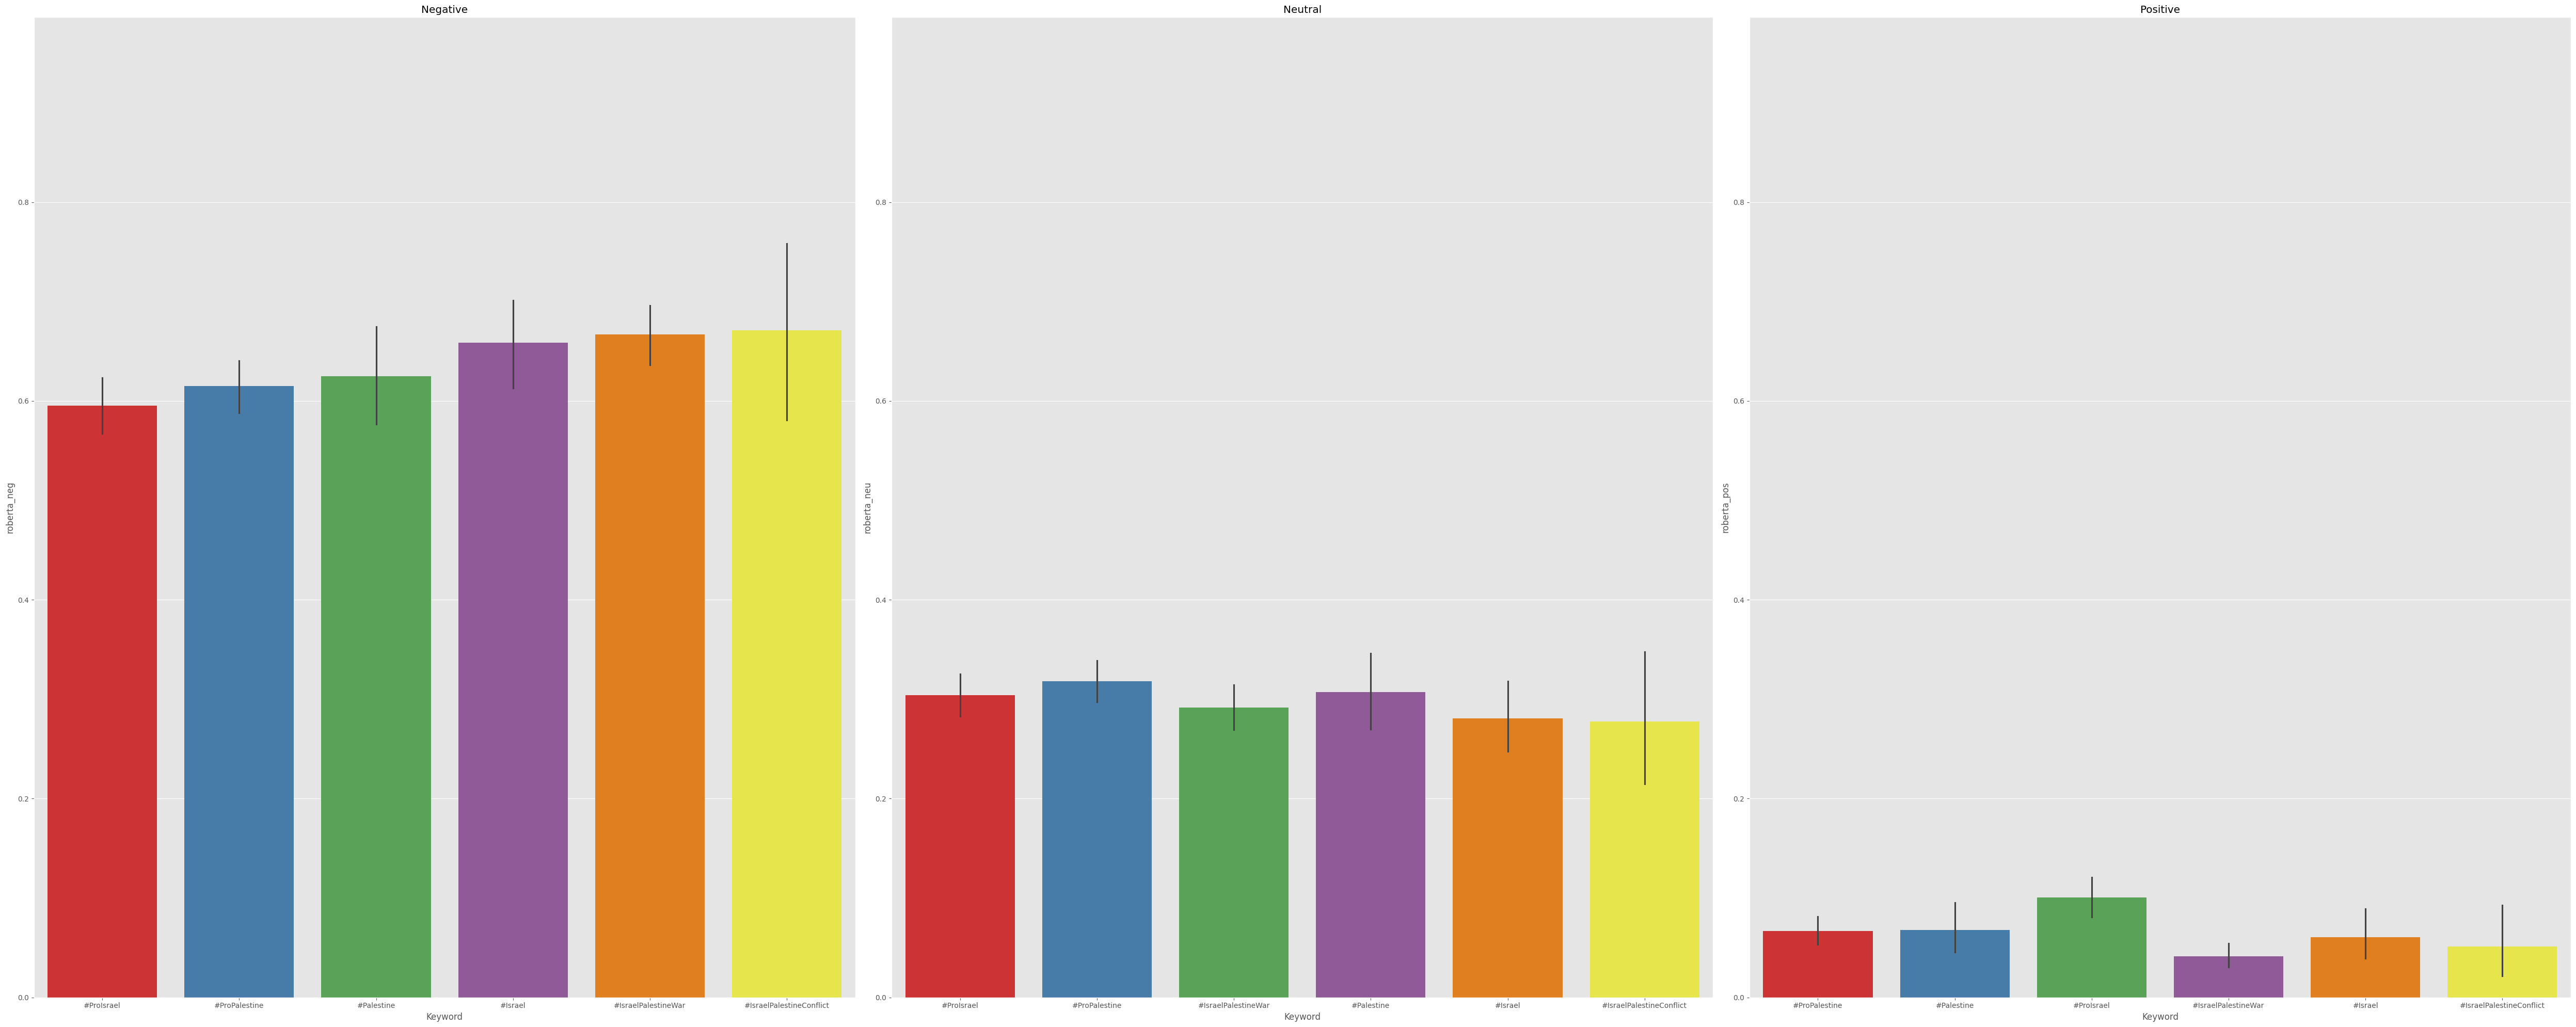

In [60]:
fig, axs = plt.subplots(1, 3, figsize=(50, 20))

# Sort values by the desired column for each subplot
sorted_neg_roberta = robertas.sort_values(by='roberta_neg')
sorted_neu_roberta = robertas.sort_values(by='roberta_neu')
sorted_pos_roberta = robertas.sort_values(by='roberta_pos')

# Create bar plots and set common y-axis limit
sns.barplot(data=sorted_neg_roberta, x='Keyword', y='roberta_neg', palette=sns.color_palette('Set1'), ax=axs[0])
axs[0].set_title('Negative')

sns.barplot(data=sorted_neu_roberta, x='Keyword', y='roberta_neu', palette=sns.color_palette('Set1'), ax=axs[1])
axs[1].set_title('Neutral')

sns.barplot(data=sorted_pos_roberta, x='Keyword', y='roberta_pos', palette=sns.color_palette('Set1'), ax=axs[2])
axs[2].set_title('Positive')

# Set common y-axis limit
max_y_roberta = max(sorted_neg_roberta['roberta_neg'].max(), sorted_neu_roberta['roberta_neu'].max(), sorted_pos_roberta['roberta_pos'].max())
for ax in axs:
    ax.set_ylim(0, max_y_roberta)

plt.tight_layout()
plt.show()